<a href="https://colab.research.google.com/github/EmaFarcy/inmersion-de-datos/blob/main/homework2_inmersion_de_datos_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

inmuebles = pd.read_csv('/content/drive/MyDrive/Inmersion Datos/Clase2/inmuebles_bogota.csv')
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [3]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [4]:
columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)
inmuebles.sample(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
7682,Casa,Casa en venta en Kennedy,4,2,183,Kennedy,Kennedy Central,$ 650.000.000
8266,Apartamento,Apartamento en venta en Teusaquillo,3,3,145,Teusaquillo,Teusaquillo,$ 900.000.000
3172,Casa,Casa en venta en Pontevedra,9,6,311,Pontevedra,La Floresta,$ 1.300.000.000
1183,Casa,Casa en venta en Tunjuelito,5,3,444,Tunjuelito,Tunjuelito,$ 390.000.000
5666,Apartamento,Apartamento en venta en Modelia,3,3,108,Modelia,Fontibón,$ 670.000.000
8321,Apartamento,Apartamento en venta en Barrios Unidos,3,3,120,Barrios Unidos,Los Andes,$ 640.000.000
6507,Casa,Casa en venta en El Contador,4,4,260,El Contador,Los Cedros,$ 1.500.000.000
3159,Apartamento,Apartamento en venta en Usme,1,3,155,Usme,USME: Alfonso López + Ciudad Usme,$ 1.080.000.000
9200,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,39,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 145.000.000
6667,Casa,Casa en venta en Barrios Unidos,6,3,350,Barrios Unidos,Los Andes,$ 1.200.000.000


In [ ]:
inmuebles.Valor[0].split() #La función split separa una cadena de texto

['$', '360.000.000']

In [5]:
valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
4616,Casa,Casa en venta en Normandia,5,3,232,Normandia,ENGATIVÁ: Santa Cecilia + Jardín Botánico,$ 1.100.000.000,$,1.100.000.000
6161,Apartamento,Apartamento en venta en Ciudad Bolívar,3,2,50,Ciudad Bolívar,CIUDAD BOLÍVAR: Monteblanco + El Tesoro + El M...,$ 186.000.000,$,186.000.000
4884,Apartamento,Apartamento en venta en Fontibón,3,1,44,Fontibón,Fontibón,$ 140.000.000,$,140.000.000


In [6]:
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True) #saca el punto. Restituye con el replace el punto con un vacio.
inmuebles[['Precio','Barrio']]

,Precio,Barrio
0,360000000,Zona Noroccidental
1,670000000,Castilla
2,1120000000,Chico Reservado
3,890000000,Usaquén
4,970000000,Bella Suiza
...,...,...
9515,290000000,Kennedy
9516,670000000,Parque Central Bavaria
9517,900000000,Restrepo
9518,335000000,Engativa


In [7]:
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000 #convierte en un tipo float. Y luego divide entre un millon y el nuevo atributo queda con 6 ceros menos.
inmuebles.info() #verifico que sucedió esta operación.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [8]:
inmuebles.describe() # Esta función me devuelve el conteo de filas, la media, el promedio, el desvío estándar, el valor mínimo, el primer cuartil, la mediana, tercer cuartil y el valor máximo.

,Habitaciones,Banos,Area,Precio_Millon
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


In [9]:
pd.set_option('display.precision',2) #elimina o dar la precisión que sólo queremos dos cifras decimales.
pd.set_option('display.float_format', lambda x: '%.2f' % x) # display para que sea float. Lambda es para ajustar los decimales.
inmuebles.describe() # ejecutamos nuevamente el describe.

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


1. Buscar los valores de tres tipos de inmuebles y realizar el gráfico del histograma. Hacer Análisis de Datos.
2. *Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable*. Para llegar al medio del m2 se debe dividir el precio por el metro cuadrado.
3. Publicar en linkedin el gráfico.

Selección de Tres Inmuebles del Database de manera aleatoria

In [24]:
df = pd.DataFrame(inmuebles)
# Selecciono tres inmuebles de manera aleatoria
inmuebles_aleatorios = df.sample(n=3)
print(inmuebles_aleatorios)

             Tipo                              Descripcion  Habitaciones  \
3393  Apartamento  Apartamento en venta en Chico Reservado             3   
5007  Apartamento             Apartamento en venta en Suba             3   
4487         Casa          Casa en venta en Barrios Unidos             3   

      Banos  Area           Barrio                                 UPZ  \
3393      3   126  Chico Reservado  CHAPINERO: Chicó Lago + El Refugio   
5007      3    96             Suba                                Suba   
4487      1   106   Barrios Unidos                           Los Andes   

              Valor Moneda     Precio  Precio_Millon  
3393  $ 634.000.000      $  634000000         634.00  
5007  $ 485.000.000      $  485000000         485.00  
4487  $ 126.050.000      $  126050000         126.05  


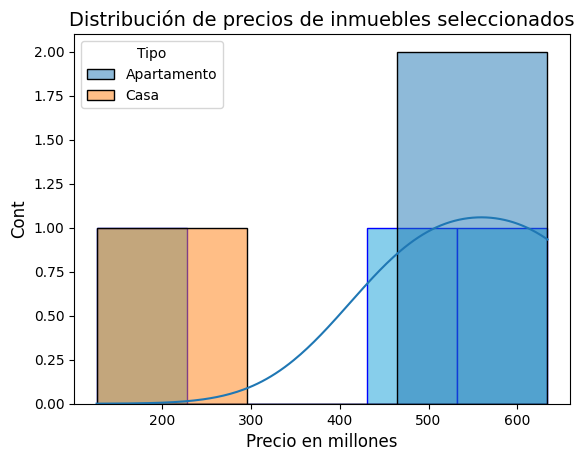

In [25]:
import matplotlib.pyplot as plt #Traemos otros paquetes como matplotlib. Es una biblioteca.
import seaborn as sns #Traemos también la biblioteca seaborn.
# Creo el histograma
plt.hist(inmuebles_aleatorios['Precio_Millon'], bins=5, color='skyblue', edgecolor='blue')
grafica = sns.histplot(data=inmuebles_aleatorios, x='Precio_Millon', kde=True, hue='Tipo') #en el eje x colocamos el precio por millón. Hue nos añade el tipo de inmueble.
# Añadir etiquetas y leyenda
plt.xlabel('Precio en millones', fontsize=12)
plt.ylabel('Cont', fontsize=12)
plt.title('Distribución de precios de inmuebles seleccionados', fontsize=14)
plt.savefig('/content/drive/MyDrive/Inmersion Datos/Clase2/valor_inmuebles.png',format='png')
# Mostrar el gráfico
plt.show()

 Precio por metro cuadrado (m²) en cada barrio

In [36]:
df = pd.DataFrame(inmuebles)
df['Precio_m2'] = df['Precio_Millon'] / df['Area']
print(df)

             Tipo                                     Descripcion  \
0     Apartamento      Apartamento en venta en Zona Noroccidental   
1            Casa                       Casa en venta en Castilla   
2     Apartamento         Apartamento en venta en Chico Reservado   
3     Apartamento                 Apartamento en venta en Usaquén   
4     Apartamento             Apartamento en venta en Bella Suiza   
...           ...                                             ...   
9515  Apartamento                 Apartamento en venta en Kennedy   
9516  Apartamento  Apartamento en venta en Parque Central Bavaria   
9517        Local                      Local en venta en Restrepo   
9518         Casa                       Casa en venta en Engativa   
9519  Apartamento                 Apartamento en venta en Tintala   

      Habitaciones  Banos  Area                  Barrio  \
0                3      2    70      Zona Noroccidental   
1                4      3   170                Castil

Top 10 barrios con el precio más alto por m²

In [37]:
avg_precio_m2 = df.groupby('Barrio')['Precio_m2'].mean().reset_index()
top_10_barrios = avg_precio_m2.nlargest(10, 'Precio_m2') # Obtengo el top 10 barrios con el precio más alto por m²
print(top_10_barrios)

              Barrio  Precio_m2
49         El Virrey      10.20
124        Santa Ana       9.36
70         La Merced       8.98
28       Chico Norte       8.54
86       Los Rosales       8.17
45        El Refugio       7.96
81        Las Nieves       7.89
46         El Retiro       7.72
30   Chico Reservado       7.61
24         Chapinero       7.43


Histograma para visualizar el top 10 del precio por m² por barrio

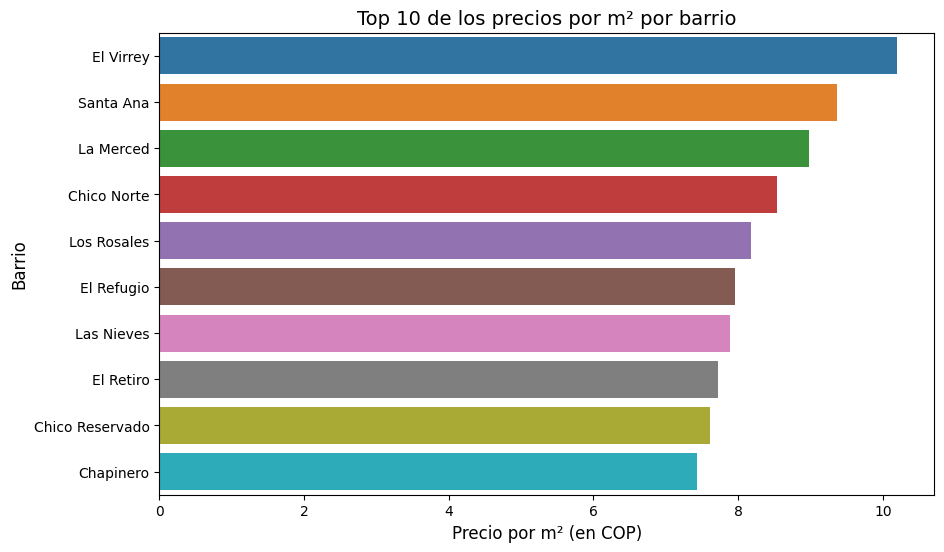

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Creo un gráfico de barras con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Precio_m2', y='Barrio', data=top_10_barrios, dodge=False)

# Añado etiquetas y título
plt.xlabel('Precio por m² (en COP)', fontsize=12)
plt.ylabel('Barrio', fontsize=12)
plt.title('Top 10 de los precios por m² por barrio', fontsize=14)
plt.savefig('/content/drive/MyDrive/Inmersion Datos/Clase2/top10_precio_m2.png',format='png')
#Visualizo el gráfico
plt.show()

## Lectura y Análisis de Datos

Los datos presentados muestran el precio promedio por metro cuadrado (m²) de diferentes barrios. Algunas observaciones y análisis que podemos inferir a partir de estos datos:

Los datos presentados muestran el precio promedio por metro cuadrado (m²) de diferentes barrios. Aquí están algunas observaciones y análisis que podemos inferir a partir de estos datos:

**Distribución de los precios**: El precio por m² varía considerablemente entre estos barrios top 10. El más alto es 10.20 (en El Virrey) y el más bajo es 7.43 (en Chapinero).

**Barrio más caro**: El barrio "El Virrey" tiene el precio por m² más alto de todos, con un valor de 10.20.

**Barrio menos caro del top 10**: El barrio "Chapinero" tiene el precio más bajo por m² dentro de estos top 10 barrios, con un valor de 7.43. Aunque es el más bajo del grupo, sigue siendo uno de los más altos comparado con otros barrios que no están en el top 10.

**Agrupación por rango de precios**:

Más de 10: 1 barrio (El Virrey).
Entre 9 y 10: 1 barrio (Santa Ana).
Entre 8 y 9: 3 barrios (La Merced, Chico Norte, Los Rosales).
Entre 7 y 8: 5 barrios (El Refugio, Las Nieves, El Retiro, Chico Reservado, Chapinero).

**Tendencias y Consideraciones para inversión/Compra**:

Si alguien está buscando comprar una propiedad en una zona de alta valorización, los barrios "El Virrey" y "Santa Ana" podrían ser opciones prioritarias, dado que tienen los precios por m² más altos.
Para inversionistas o compradores con un presupuesto más limitado, barrios como "Chapinero" y "Chico Reservado" podrían ofrecer oportunidades más accesibles, aunque todavía están entre los barrios con los precios más altos por m².
Análisis de proximidad: Sería interesante analizar si los barrios que tienen precios por m² similares están geográficamente cerca uno del otro. Esto podría indicar zonas de la ciudad donde los precios por m² son generalmente altos.